# Supervised ML
- As a data scientist
- I want to build regression models that predict customer lifetime value
 - So that we can identify high-value customers and optimize marketing strategies

## Requirements:
-  Implement Linear Regression with RFM features as baseline
-  Build Random Forest regressor with 200 estimators for non-linear relationships
-  Train XGBoost with hyperparameter tuning for optimal performance
-  Evaluate models using RMSE, MAE, and R-squared metrics
-  Perform feature importance analysis to identify key value drivers
-  Use cross-validation to ensure model robustness and prevent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error,
                            r2_score, mean_squared_error)

import joblib

# Load Data

In [2]:
rfm_std = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Preprocessing\rfm_std.csv")

In [3]:
rfm_std.head()

,Recency,Frequency,Monetary,CLV
0,0.002681,0.028986,0.016241,5.0
1,0.198391,0.014493,0.006766,3.4
2,0.048257,0.000000,0.005485,2.8
3,0.828418,0.000000,0.001250,1.3
4,0.093834,0.028986,0.006270,4.1


In [4]:
X = rfm_std.drop('CLV', axis=1)
y = rfm_std['CLV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression ( Baseline )

In [5]:
LR = LinearRegression()
LR.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred_LR = LR.predict(X_test)

In [7]:
mae = mean_absolute_error(y_pred_LR, y_test)
mse = mean_squared_error(y_test, y_pred_LR)
r2 = r2_score(y_test, y_pred_LR)

print("Mean Absolute Error :     ", mae)
print("Mean Squared Error :      ", mse)
print("R-Squared Score :         ", round(r2*100, 2),"%")

Mean Absolute Error :      0.6354465874011029
Mean Squared Error :       0.731152485588481
R-Squared Score :          50.86 %


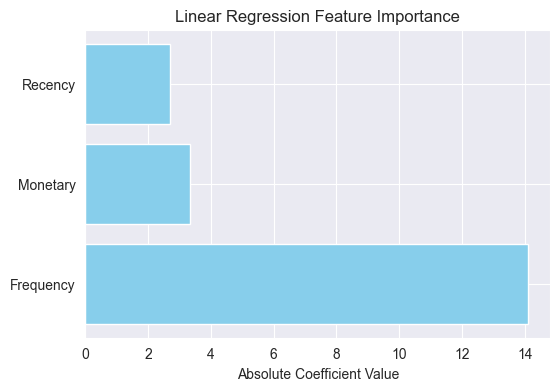

In [8]:
lr_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(LR.coef_)
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(6,4))
plt.barh(lr_importance['feature'], lr_importance['importance'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Linear Regression Feature Importance')
plt.show()

# 2. Random Forest

In [9]:
RF = RandomForestRegressor(n_estimators=200, random_state=42)
RF.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred_RF = RF.predict(X_test)

In [11]:
mae = mean_absolute_error(y_pred_RF, y_test)
mse = mean_squared_error(y_test, y_pred_RF)
r2 = r2_score(y_test, y_pred_RF)

print("Mean Absolute Error :     ", mae)
print("Mean Squared Error :      ", mse)
print("R-Squared Score :         ", round(r2*100, 2),"%")

Mean Absolute Error :      0.12663310185185386
Mean Squared Error :       0.033035525462963025
R-Squared Score :          97.78 %


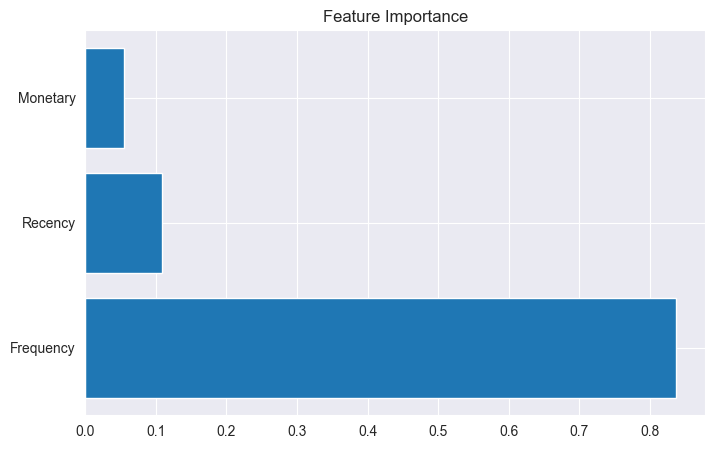

In [12]:
importances_RF = RF.feature_importances_

feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_RF
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'])
plt.title('Feature Importance')
plt.show()

# 3. XGBoost

In [13]:
XGB = XGBRegressor(random_state=42)
param = {
    'n_estimators': [200, 400, 600],       # عدد الأشجار
    'learning_rate': [0.01, 0.05, 0.1],   # سرعة التعلم
    'max_depth': [4, 6, 8],               # عمق الشجرة
}

grid = GridSearchCV(XGB, param, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [4, 6, ...], 'n_estimators': [200, 400, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [14]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", - grid.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 600}
Best Score: 0.16283381923277623


In [15]:
XGB_Best = XGBRegressor(n_estimators=600, learning_rate=0.01,
                        max_depth=4, gamma=0, random_state=42,
                        reg_alpha=0.1)

XGB_Best.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [16]:
y_pred_XGB = XGB_Best.predict(X_test)

In [17]:
mae = mean_absolute_error(y_pred_XGB, y_test)
mse = mean_squared_error(y_test, y_pred_XGB)
r2 = r2_score(y_test, y_pred_XGB)

print("Mean Absolute Error :     ", mae)
print("Mean Squared Error :      ", mse)
print("R-Squared Score :         ", round(r2*100, 2),"%")

Mean Absolute Error :      0.12436813883207465
Mean Squared Error :       0.024777983542883276
R-Squared Score :          98.33 %


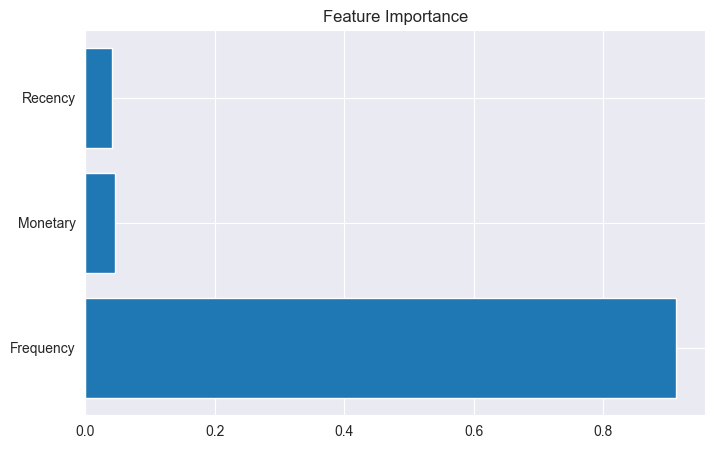

In [18]:
importances_XGB_Best = XGB_Best.feature_importances_

feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_XGB_Best
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'])
plt.title('Feature Importance')
plt.show()

# `The Best Model For RFM Data : XGBoost`

In [19]:
import pandas as pd
performance = pd.DataFrame(
    {
     'LR': ['0.63', '0.73', '50.86%'],
     'RF': ['0.12', '0.03', '97.78%'],
     'XGB': ['0.12', '0.02', '98.33%']
     },
    index=[['MAE', 'MSE', 'R2']]
)

In [20]:
performance

,LR,RF,XGB
MAE,0.63,0.12,0.12
MSE,0.73,0.03,0.02
R2,50.86%,97.78%,98.33%


In [21]:
joblib.dump(XGB_Best, 'XGB_Best_clv.pkl')

['XGB_Best_clv.pkl']

In [22]:
joblib.dump(LR, 'LR_clv.pkl')

['LR_clv.pkl']

In [23]:
joblib.dump(RF, 'RF_clv.pkl')

['RF_clv.pkl']